In [1]:
#importamos las bibliotecas que vamos a utilizar
import pandas as pd
import re
import src.functions as func

In [2]:
#Traemos el archivo con los datos a analizar
df = pd.read_csv('input/attacks.csv',encoding='latin-1')

In [3]:
df.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
df.shape

(25723, 24)

## Lo primero que vamos a hacer es renombrar las columnas para que no tengamos problemas con esos espacios

In [5]:
columnas_actuales=list(df.columns)

In [6]:
nuevas_columnas=['Case', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal', 'Time',
       'Species', 'Investigator_Source', 'pdf', 'href_formula', 'href',
       'Case1', 'Case2', 'original_order', 'Unnamed: 22',
       'Unnamed: 23']
type(nuevas_columnas)

list

In [7]:
dict_columnas = {columnas_actuales[i]: nuevas_columnas[i] for i in range(len(columnas_actuales))} 
dict_columnas

{'Case Number': 'Case',
 'Date': 'Date',
 'Year': 'Year',
 'Type': 'Type',
 'Country': 'Country',
 'Area': 'Area',
 'Location': 'Location',
 'Activity': 'Activity',
 'Name': 'Name',
 'Sex ': 'Sex',
 'Age': 'Age',
 'Injury': 'Injury',
 'Fatal (Y/N)': 'Fatal',
 'Time': 'Time',
 'Species ': 'Species',
 'Investigator or Source': 'Investigator_Source',
 'pdf': 'pdf',
 'href formula': 'href_formula',
 'href': 'href',
 'Case Number.1': 'Case1',
 'Case Number.2': 'Case2',
 'original order': 'original_order',
 'Unnamed: 22': 'Unnamed: 22',
 'Unnamed: 23': 'Unnamed: 23'}

In [8]:
df=df.rename(columns = dict_columnas, inplace = False)
df

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator_Source,pdf,href_formula,href,Case1,Case2,original_order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Compruebamos que en la columna Unnamed 23 son todos los valores null menos 2, y en la columna Unnamed 22 todas menos 1. Eliminaremos las columnas, no aportan

In [9]:
df['Unnamed: 23'].isnull().sum()

25721

In [10]:
df['Unnamed: 22'].isnull().sum()

25722

In [11]:
df_clean=df.drop(['Unnamed: 22']+['Unnamed: 23']+['original_order']+['href']+['href_formula']+['pdf']+['Investigator_Source']+['Case1']+['Case2'],axis=1)
df_clean

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_clean.isnull().sum()

Case        17021
Date        19421
Year        19423
Type        19425
Country     19471
Area        19876
Location    19961
Activity    19965
Name        19631
Sex         19986
Age         22252
Injury      19449
Fatal       19960
Time        22775
Species     22259
dtype: int64

## Siguen quedando filas con todos sus valores en Nan; las eliminamos igualmente

In [13]:
df_clean=df_clean.dropna(how = 'all') 
df_clean

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_clean=df_clean.dropna(how = 'all')
df_clean
#No existen filas con NaN en todos sus campos

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_clean=df_clean.drop_duplicates()
df_clean

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Quitamos las filas donde todas sus columnas tienen NaN menos 'Case'

In [16]:
df_clean=df_clean.dropna(subset=[ 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity',  'Sex', 'Age', 'Injury', 'Fatal', 'Time',
       'Species' ], how='all') 
df_clean

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN


## Hipótesis:
### Sus ataques son más frecuentes en hombres, aunque en más ocasiones las mujeres fallecen


## Observamos la distribución de valores de género. Vemos que podemos quedarnos con únicamente M y F

In [17]:
#De aquí sí se pueden sacar conclusiones
#Vamos a intentar limpiar para que todos los datos sean M y F
df_clean['Sex'].value_counts()

M      5094
F       637
M         2
N         2
.         1
lli       1
Name: Sex, dtype: int64

In [18]:
genero=str(df_clean['Sex'].unique())
genero

"['F' 'M' nan 'M ' 'lli' 'N' '.']"

In [19]:
df_clean.Sex=df_clean.Sex.str.replace(r"M(.*)",'M')
genero=str(df_clean['Sex'].unique())
genero

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


"['F' 'M' nan 'lli' 'N' '.']"

In [20]:
df_clean.loc[df['Sex'] == 'lli']

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
1624,2004.11.11.b,11-Nov-2004,2004.0,Unprovoked,USA,California,"Bunkers, Humboldt Bay, Eureka, Humboldt County",Surfing,Brian Kang,lli,38,"Lacerations to hand, knee & thigh",N,13h30,5.5 m [18'] white shark


In [21]:
df_clean['Sex'][1624]='M'

<ipython-input-21-15461415ffcd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Sex'][1624]='M'
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [22]:
df_clean.loc[df['Sex'] == 'N']

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
4938,1934.07.11,11-Jul-1934,1934.0,Boating,AUSTRALIA,New South Wales,Cronulla,Fishing,"18' boat, occupants William & Leslie Newton",N,NaN,No injury to occupants Sharks continually foll...,N,NaN,"Blue pointer, 11'"
6131,1801.12.18.R,Reported 18-Dec-1801,1801.0,Provoked,NaN,NaN,NaN,Standing on landed shark's tail,Stephen Pettigew,N,NaN,"FATAL, PROVOKED INCIDENT",Y,NaN,12' shark


In [23]:
df_clean['Sex'][6131]='M'

<ipython-input-23-1d086138ce6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Sex'][6131]='M'
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [24]:
genero=str(df_clean['Sex'].unique())
genero

"['F' 'M' nan 'N' '.']"

In [25]:
df_clean=df_clean[~df_clean['Sex'].isin(['N', '.'])]
df_clean
genero=str(df_clean['Sex'].unique())
genero

"['F' 'M' nan]"

In [26]:
df_clean.loc[df['Sex'].isnull()==True]

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
32,2018.04.09,09-Apr-2018,2018.0,Unprovoked,NEW CALEDONIA,NaN,"Magenta Beach, Noumea",Windsurfing,NaN,NaN,NaN,"No injury, shark bit board",N,17h00,2 m shark
59,2017.11.25.R,Reported 25-Nov-2017,2017.0,Sea Disaster,LIBYA,NaN,Gars Garabulli,2 boats capsized,31 migrants,NaN,NaN,FATAL,Y,NaN,Some drowned but other may have been killed by...
86,2017.09.14,Sep-2017,2017.0,Boating,AUSTRALIA,Westerm Australia,Esperance,Fishing,NaN,NaN,NaN,"sharks rammed boats, no injury to occupants",N,NaN,"White shark, 3.5m"
124,2017.07.02,02-Jul-2017,2017.0,Invalid,COMOROS,Anjouan,Moya,Fishing,NaN,NaN,NaN,"Skull found in shark, a probable drowning & sc...",NaN,NaN,Shark involvement prior to death not confirmed
154,2017.04.17.b,17-Apr-2017,2017.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",NaN,NaN,NaN,NaN,Minor bite to the foot,N,Afternoon,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6212,ND-0107,Before 2004,0.0,Boat,MOZAMBIQUE,Inhambane Province,Off Inhambane,Fishing,"4.8-metre skiboat, Occupants: Rod Salm & 4 fri...",NaN,NaN,"No injury to occupants, shark bumped boat",N,NaN,Whale shark
6237,ND.0073,"No date, Before 1963",0.0,Unprovoked,SINGAPORE,NaN,"Keppel Harbor, 2 miles from Singapore city ce...",Swimming,NaN,NaN,NaN,Recovered,N,NaN,NaN
6259,ND.0044,1941-1945,0.0,Sea Disaster,NaN,NaN,NaN,A group of survivors on a raft for 17-days,C.,NaN,NaN,"FATAL, shark leapt into raft and bit the man w...",Y,Late afternoon,1.2 m [4'] shark
6278,ND.0024,Between 1918 & 1939,0.0,Unprovoked,REUNION,Saint-Denis,Barachois,Swimming,NaN,NaN,NaN,FATAL,Y,NaN,NaN


### Limpiando los valores de Fatal

In [27]:
df_clean['Fatal'].value_counts()

N          4292
Y          1387
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: Fatal, dtype: int64

In [28]:
df_clean['Fatal']=df_clean.Fatal.str.replace(r"(\s)N",'N')
df_clean['Fatal']=df_clean.Fatal.str.replace(r"N(\s)",'N')
df_clean['Fatal'].value_counts()

<ipython-input-28-d92bb2603da2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Fatal']=df_clean.Fatal.str.replace(r"(\s)N",'N')
<ipython-input-28-d92bb2603da2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Fatal']=df_clean.Fatal.str.replace(r"N(\s)",'N')


N          4300
Y          1387
UNKNOWN      71
M             1
2017          1
y             1
Name: Fatal, dtype: int64

In [29]:
df_clean.loc[df['Fatal'] == 'M']

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
285,2016.04.18.b,18-Apr-2016,2016.0,Provoked,FRENCH POLYNESIA,Tuamotos,Makemo Atoll,Spearfishing,Hoata Iotua,M,22,Laceration to knee by speared shark PROVOKED I...,M,Morning,"Grey reef shark, 2 m"


In [30]:
df_clean['Fatal'][285]='N'

<ipython-input-30-05fd4e36ae35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Fatal'][285]='N'
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [31]:
df_clean.loc[df['Fatal'] == '2017']

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
786,2012.06.10,10-Jun-2012,2012.0,Provoked,ITALY,Sardinia,Muravera,Attempting to rescue an injured & beached shark,Giorgio Zara,M,57,Lower left leg injured PROVOKED ACCIDENT,2017,Morning,"Blue shark, 2.5m"


In [32]:
df_clean['Fatal'][786]='N'

<ipython-input-32-8aefa6e0c14a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Fatal'][786]='N'
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [33]:
df_clean['Fatal']=df_clean.Fatal.str.replace(r"y",'Y')
df_clean['Fatal'].value_counts()

<ipython-input-33-e44e9a9fe1ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Fatal']=df_clean.Fatal.str.replace(r"y",'Y')


N          4302
Y          1388
UNKNOWN      71
Name: Fatal, dtype: int64

In [34]:
df_clean.loc[df['Fatal'] == 'UNKNOWN']

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
624,2013.09.08,08-Sep-2013,2013.0,Unprovoked,USA,South Carolina,"St. Helena Island, Beaufort County",NaN,female,F,NaN,No details,UNKNOWN,NaN,NaN
1270,2008.04.20.a,20-Apr-2008,2008.0,Unprovoked,AUSTRALIA,New South Wales,Crescent Head,NaN,Jamie Adlington,M,NaN,NaN,UNKNOWN,NaN,"Tiger shark, 2.3m"
2250,1997.06.07,07-Jun-1997,1997.0,Unprovoked,BRAZIL,Rio de Janeiro,"Copacabana, Rio de Janeiro",Bathing,José Luiz Lipiani,M,NaN,NaN,UNKNOWN,NaN,NaN
2260,1997.02.21,21-Feb-1997,1997.0,Unprovoked,USA,Hawaii,"Sunset Beach, O'ahu",NaN,Gersome Perreno,M,NaN,No details,UNKNOWN,NaN,NaN
2267,1996.12.29,29-Dec-1996,1996.0,Unprovoked,AUSTRALIA,Queensland,Coolum Beach,Surfing,Blair Hall,M,18,NaN,UNKNOWN,18h00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6167,1617.00.00.R,Reported 1617,1617.0,Unprovoked,INDIA,West Bengal,Ganges Delta,NaN,Indian people,NaN,NaN,NaN,UNKNOWN,NaN,NaN
6169,1595.00.00,1595,1595.0,Unprovoked,INDIA,Kerala,River Cochin,Ship lay at anchor & man was working on its ru...,male,M,NaN,"Leg severed mid-thigh, hand severed, arm above...",UNKNOWN,NaN,NaN
6171,1555.00.00,1555,1555.0,Unprovoked,NaN,NaN,NaN,Swimming,male,M,NaN,NaN,UNKNOWN,NaN,NaN
6172,1554.00.00,Ca. 1554,1554.0,Unprovoked,FRANCE,Nice & Marseilles,NaN,NaN,males (wearing armor),M,NaN,NaN,UNKNOWN,NaN,Possibly white sharks


In [35]:
df_clean=df_clean[~df_clean['Fatal'].isin(['UNKNOWN'])]
df_clean
#Como veo que hay menos valores de fatal que en el dataFrame, voy a buscar los valores nulos

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN


In [36]:
df_clean['Fatal'].value_counts()
df_clean.loc[df['Fatal'].isnull()==True]

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
27,2018.04.15.c,15-Apr-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,Pablo de Melo,M,34,"Multiple severe injuries to arms and leg, leg ...",NaN,NaN,NaN
76,2017.10.01,01-Oct-2017,2017.0,Invalid,SOUTH AFRICA,Western Cape Province,Dyer Island,Scuba Diving,Bradley Fick,M,31,FATAL,NaN,NaN,Death may have been due to drowning
79,2017.09.24.b,24-Sep-2017,2017.0,Invalid,USA,New York,Rockaway,Surfing,Michah Behrend,M,33,"Lacerations to right ankle, foot & toe",NaN,15h30,Questionable
84,2017.09.15.b,15-Sep-2017,2017.0,Invalid,SOUTH AFRICA,Western Cape Province,Hawston,Scuba Diving,Wayon Love,M,25,"FATAL, but death was probably due to drowning",NaN,Afternoon,NaN
98,2017.08.26.b,26-Aug-2017,2017.0,Invalid,SPAIN,Castellón,Grao de Moncofa,Swimming,female,F,11,Lacerations to left foot,NaN,Midday,Shark involvement questionable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6147,1767.00.00,1767,1767.0,Invalid,FRANCE,Côte d'Azur,St. Tropez,Bathing,Samuel Matthews,M,NaN,Lacerations to arm & leg,NaN,NaN,Description of shark does not ring true
6157,1733.00.00,1733,1733.0,Invalid,ICELAND,Bardestrand,Talkknefiord,NaN,NaN,NaN,NaN,"Partial hominid remains recovered from shark, ...",NaN,NaN,Shark involvement prior to death unconfirmed
6158,1723.00.00,1723,1723.0,Unprovoked,ROATAN,NaN,NaN,NaN,Philip Ashton,M,NaN,Struck on thigh,NaN,NaN,NaN
6164,1642.00.00.b,Late 1600s Reported 1728,1642.0,Invalid,GUINEA,NaN,NaN,Went overboard,crew member of the Nieuwstadt,M,NaN,FATAL,NaN,NaN,Questionable


In [37]:
re.findall(r"FATAL*",str(df_clean['Injury']))

['FATAL', 'FATAL', 'FATAL', 'FATAL', 'FATAL']

In [38]:
tabla_fatal=df_clean[df_clean['Fatal']=='Y'][['Sex','Case']]

In [39]:
tabla_fatal=tabla_fatal.groupby("Sex").agg({"Case":"count"})
display(tabla_fatal)

,Case
Sex,
F,107
M,1174


In [40]:
tabla_sexo=df_clean.groupby("Sex").agg({"Case":"count"})
display(tabla_sexo)


,Case
Sex,
F,633
M,5061


In [41]:
tablas= pd.concat([tabla_fatal,tabla_sexo], axis=1)
tablas.columns = ["Fatales","Casos Totales"]
tablas

,Fatales,Casos Totales
Sex,,
F,107,633
M,1174,5061


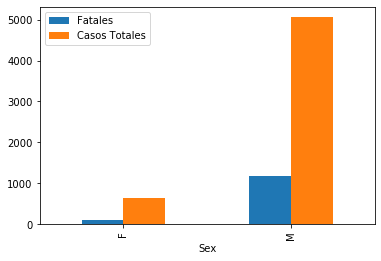

In [42]:
tablas.plot.bar()

In [43]:
fatalFperc=tabla_fatal.Case.F.sum()/tabla_sexo.Case.F.sum()
fatalMperc=tabla_fatal.Case.M.sum()/tabla_sexo.Case.M.sum()

In [44]:
Fatal_perc=[round(fatalFperc*100,2), round(fatalMperc*100,2)]
Fatal_perc

[16.9, 23.2]

In [45]:
tablas['Fatal Percent per sex']=Fatal_perc
tablas

,Fatales,Casos Totales,Fatal Percent per sex
Sex,,,
F,107,633,16.9
M,1174,5061,23.2


In [ ]:
##Intentar seguir por aqui

In [ ]:
caseF=tabla_sexo.Case.F.sum()
caseM=tabla_sexo.Case.M.sum()
fatalF=tabla_sexo.Fatal.F.sum()
fatalM=tabla_sexo.Fatal.M.sum()
valores=[caseF+caseM-fatalF-fatalM, fatalF, fatalM]

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.plot.pie(valores, labels=['Non fatal cases''Fatal for F','Fatal for M'], autopct='%1.1f%%',
        shadow=True, startangle=90)

### La mayor parte de los ataques fueron producidos a surfistas

In [ ]:
#Veo si hay suficientes datos
actividad=str(df['Activity'].unique())
actividad


In [ ]:
#Voy a intentar agrupar las actividades limpiándolas
df['Activity'].value_counts()

In [ ]:
df['Activity_clean']=df['Activity']

In [ ]:
df.Activity_clean=df.Activity.str.replace(r"(.*)Surfing(.*)",'Surfing')

In [ ]:
df['Activity_clean'].value_counts()

In [ ]:
"""
 res=re.findall(r":.*<",line)
re.findall(r"From:.*",fh)
 """

### El tiburón blanco es la raza de tiburón más peligrosa (mayor número de ataques)

In [ ]:
#Vamos a  buscar los tiburones blancos. No parece que merezca la pena analizar eso, los valores están muy diseminados
especies=str(df_clean['Species'].unique())
df_clean['Species'].value_counts()